# Exploring the data

### Fetching and checking the data

In [58]:
import pandas as pd # import the pandas library
df = pd.read_csv("netflix-rotten-tomatoes-metacritic-imdb.csv") # fetch the data
df.sample() # look at a sample row to see what types of values it contains

,Title,Genre,Tags,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,Director,Writer,...,Netflix Release Date,Production House,Netflix Link,IMDb Link,Summary,IMDb Votes,Image,Poster,TMDb Trailer,Trailer Site
11151,U.S. Marshals,"Action, Crime, Thriller","Crime Films,Action Thrillers,Action & Adventur...",English,Movie,2.3,"Israel,Canada",> 2 hrs,Stuart Baird,"John Pogue, Roy Huggins",...,2016-07-31,"Warner Brothers, Kopelson Entertainment",https://www.netflix.com/watch/5670449,https://www.imdb.com/title/tt0120873,A convicted murderer is on his way to prison w...,96076.0,https://occ-0-3466-2774.1.nflxso.net/dnm/api/v...,https://images-na.ssl-images-amazon.com/images...,https://www.youtube.com/watch?v=J25z6Rn5Xek,YouTube


In [59]:
df.columns # list the column names (useful if the previous view doesn't show us everything we need)

Index(['Title', 'Genre', 'Tags', 'Languages', 'Series or Movie',
       'Hidden Gem Score', 'Country Availability', 'Runtime', 'Director',
       'Writer', 'Actors', 'View Rating', 'IMDb Score',
       'Rotten Tomatoes Score', 'Metacritic Score', 'Awards Received',
       'Awards Nominated For', 'Boxoffice', 'Release Date',
       'Netflix Release Date', 'Production House', 'Netflix Link', 'IMDb Link',
       'Summary', 'IMDb Votes', 'Image', 'Poster', 'TMDb Trailer',
       'Trailer Site'],
      dtype='object')

In [60]:
df.shape # see how many rows and columns we have

(15480, 29)

### Answering the questions

#### What genre of movie has been the most popular in the last three years?  
Preparing and filtering the data so we can investigate one of the questions we've been asked to anaylse.  
  
  FIRST: decide what 'last 3 years' means. There are several options, below I've used the start of the financial year in 2020 as a cut-off. Anything older than that will be excluded.

In [47]:
# convert date columns to datetime dtype
df['Release Date'] = pd.to_datetime(df['Release Date']) # making sure 'Release Date' is actually a datetime dtype

# filter rows that meet the 2 conditions
# syntax is: <new dataframe df3> is <old dataframe df> where [ (condition 1 is true) AND (condition2 is true)]
df3 = df.loc[(df['Release Date'] >= pd.Timestamp(2020, 4, 5)) & (df['Series or Movie'] == 'Movie')] # choosing the last 3 financial years 

# check how many rows we have remaining to work with
df3.shape

(434, 29)

SECOND: Look at values in the 'Genre' column to see what we will be working with.  
column_name.unique() tells us what all the values are.  
column_name.nunique() tells us how many unique values there are.

In [ ]:
# check possible values for Genre
df3['Genre'].unique()
#df3['Genre'].nunique()

If the Genre information seems too messy to use as a category, we can choose different methods to extract somethign useful from it.  
Choosing only the first value from the list of genres may not be the best approach, but it is the easiest to do right now! We will try that first just so we have something to work with.

In [51]:
df3["first_genre"] = df["Genre"].str.split(',').str[0] # gets the first item in the 'Genre' column
df3['first_genre'].unique() # checking the values we now have as categories

C:\Users\LucyKnight\AppData\Local\Temp\ipykernel_21176\64946933.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["first_genre"] = df["Genre"].str.split(',').str[0]


array(['Comedy', 'Drama', 'Adventure', 'Mystery', 'Animation',
       'Biography', 'Action', 'Documentary', 'Sci-Fi', 'Crime', 'Horror',
       'Thriller', 'Romance', 'Family', 'Fantasy', nan, 'War', 'Short',
       'Reality-TV', 'Music', 'Sport'], dtype=object)

Removing unnecessary columns

In [52]:
# checking what columns we have - we want a list of the names 
# so we can check spelling, capitalisation etc 
# when we add them to the list of columns we want to remove 
df3.columns 

Index(['Title', 'Genre', 'Tags', 'Languages', 'Series or Movie',
       'Hidden Gem Score', 'Country Availability', 'Runtime', 'Director',
       'Writer', 'Actors', 'View Rating', 'IMDb Score',
       'Rotten Tomatoes Score', 'Metacritic Score', 'Awards Received',
       'Awards Nominated For', 'Boxoffice', 'Release Date',
       'Netflix Release Date', 'Production House', 'Netflix Link', 'IMDb Link',
       'Summary', 'IMDb Votes', 'Image', 'Poster', 'TMDb Trailer',
       'Trailer Site', 'first_genre'],
      dtype='object')

In [53]:
# dropping som eof the columns we are sure we don;t need right now
# we can drop a single column, or a list of several
df3 = df3.drop(columns=['Languages', 'Hidden Gem Score', 'Actors', 'Writer', 'Director', 'Runtime', 'Image', 'Poster'])

Our first basic plot appears to show that Comedy is the most prevalent / popular genre.  
This based on some assumptions:  
* the first item in the 'Genre' column is most significant, and  
* the date range we have defined is what the client means.

C:\Users\LucyKnight\AppData\Local\Temp\ipykernel_21176\1767735300.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df3['first_genre'], palette="Set3", legend=False)


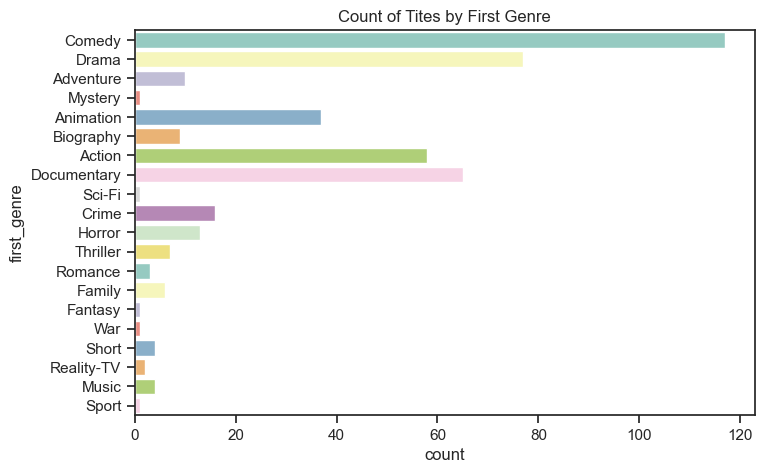

In [57]:
# Count Plot
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 5))
sns.countplot(data=df3['first_genre'], palette="Set3", legend=False)
plt.title("Count of Titles by First Genre")
plt.show()

### How complicated are the relationships between the variables?

We can use some multivariate plots (see the second to last section in the other Jupyter notebook we look ed at today for other examples) to see whether there are any visible patterns that look interesting and/or worth investigating.  
  
Try changing which categorical variable is set as 'hue' for the plots below.  
    
You can also change which numeric variables are being plotted on the x and y axes.  
      
Play with this scatterplot to see if you find any different insights you'd like to investigate later.

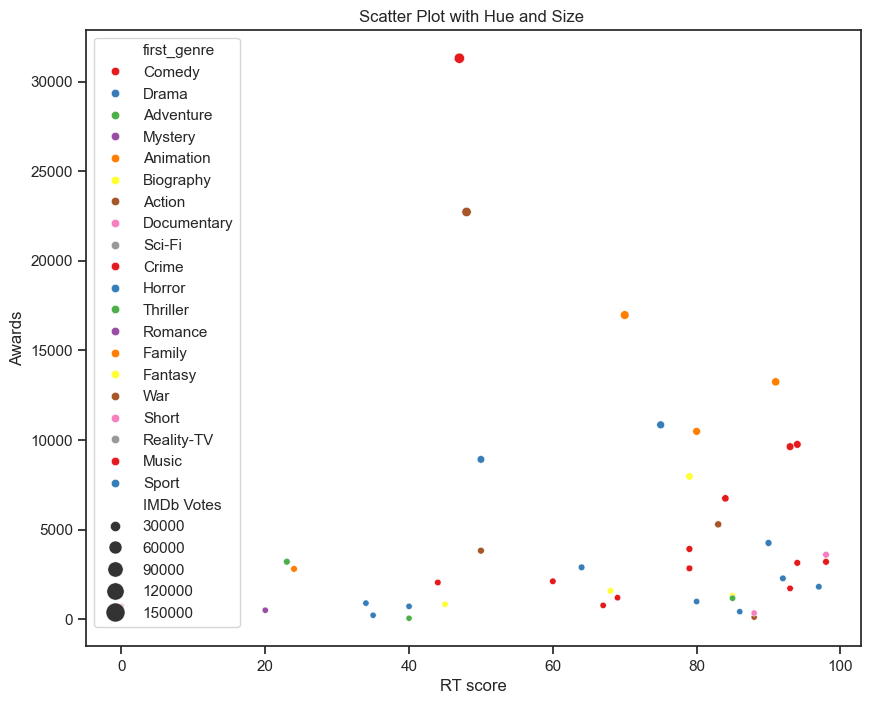

In [61]:
# Scatter Plot with Hue and Size
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x="Rotten Tomatoes Score", 
    y="IMDb Votes", 
    data=df3, 
    hue="first_genre",      # Color by day (categorical)
    size="IMDb Votes",    # Vary marker size by size column (numerical)
    sizes=(20, 200),  # Define the size range for markers
    palette="Set1"  # Color palette
)
plt.title("Scatter Plot with Hue and Size ")
plt.xlabel("RT score")
plt.ylabel("Awards")
plt.show()

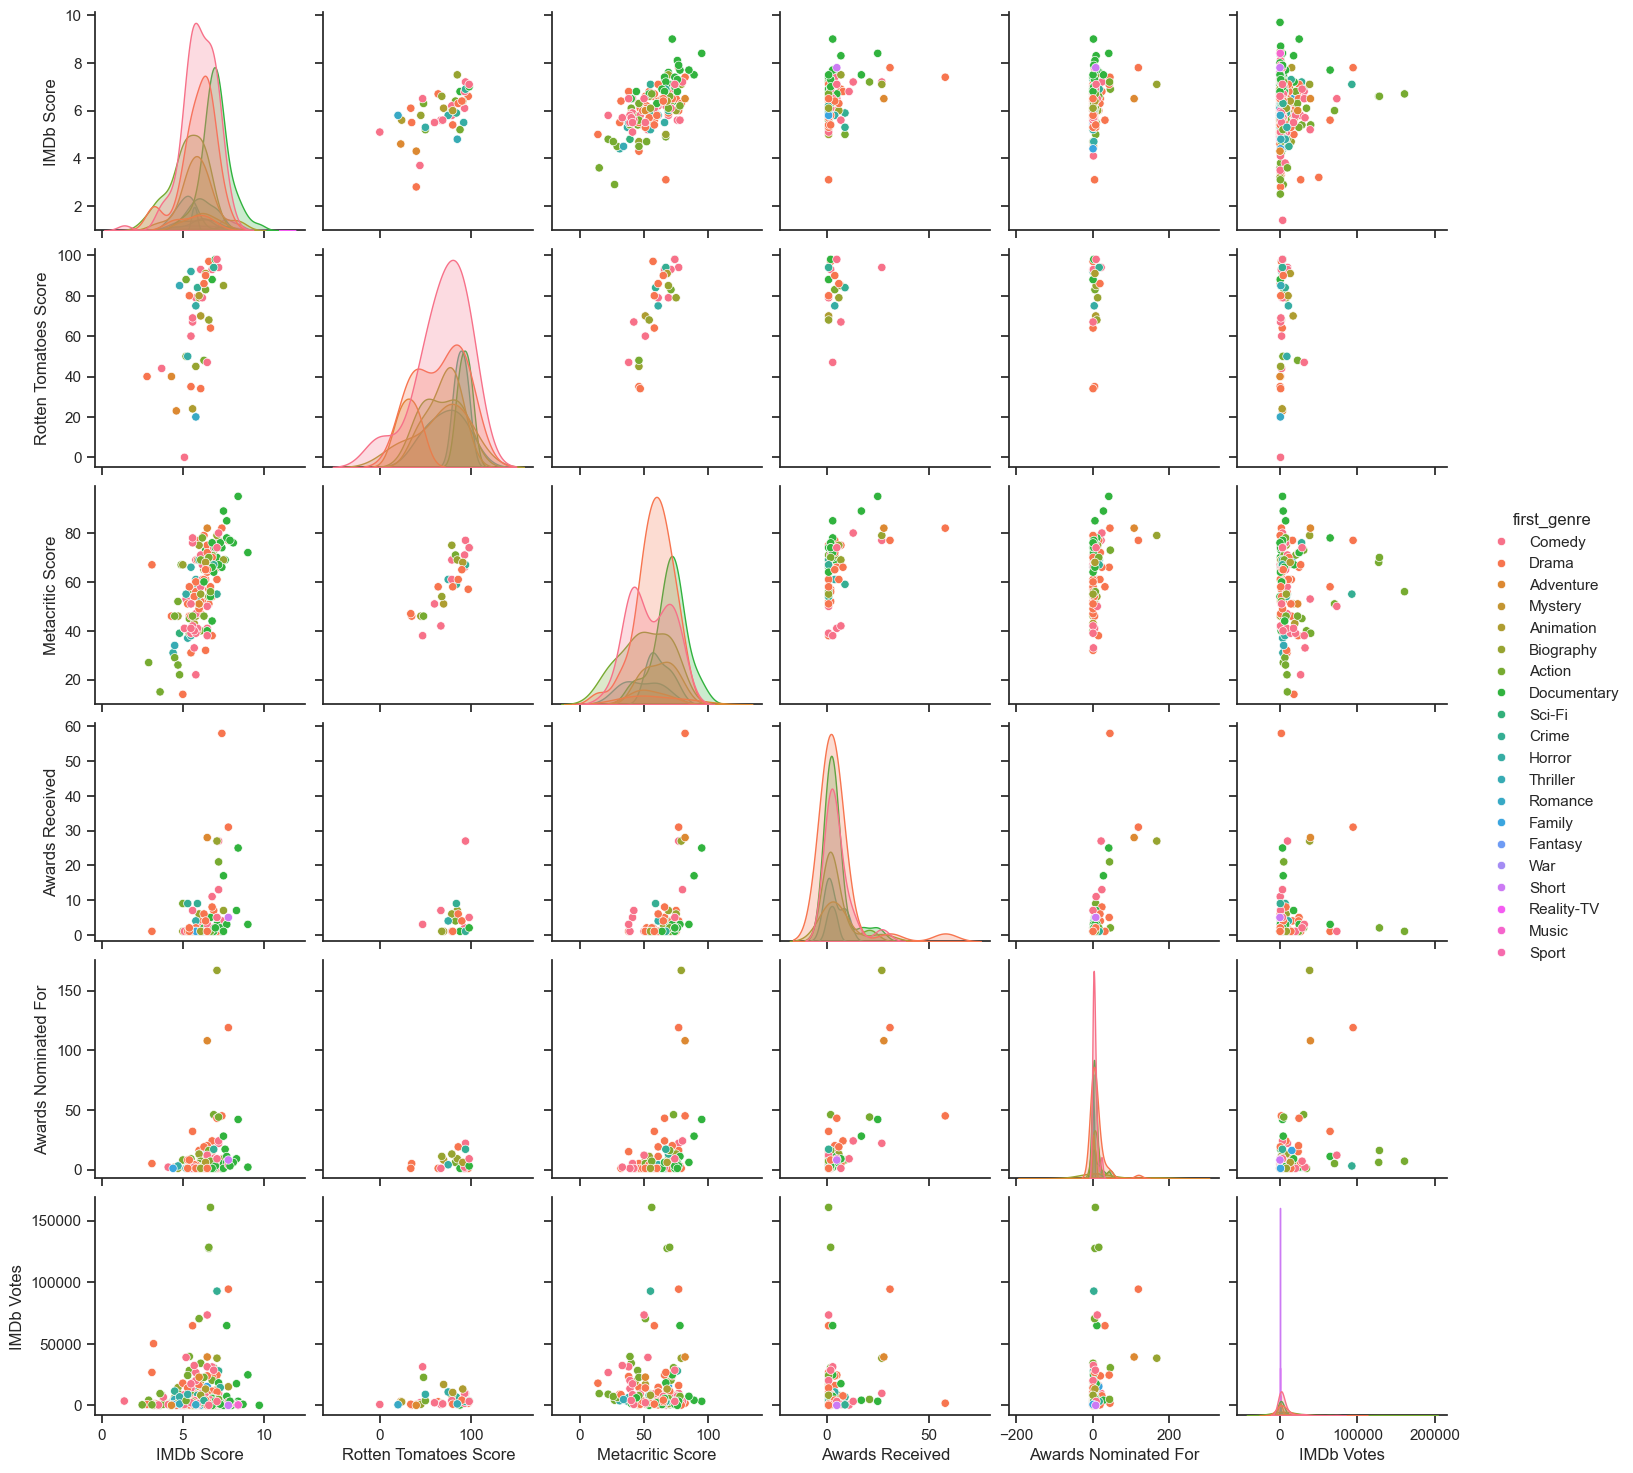

In [63]:
# Pair Plot
sns.set_style(style="ticks")
sns.pairplot(df3, hue="first_genre")
plt.show()

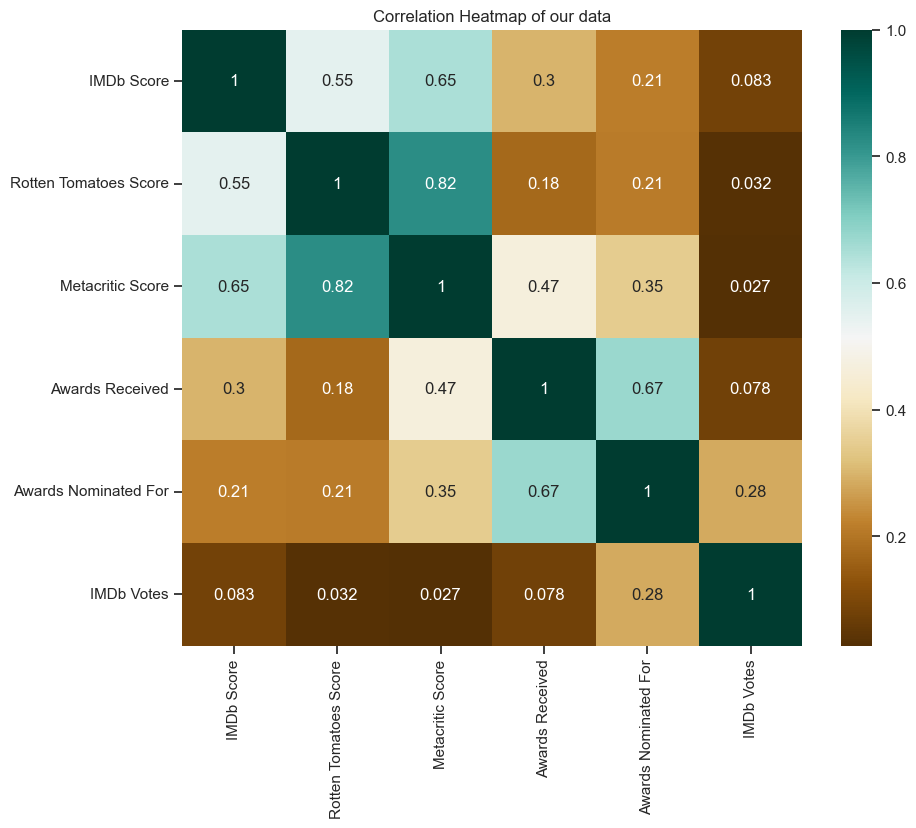

In [64]:
# we want to use only numeric values, so we supply a list of these
numeric_cols = df3.select_dtypes(include=['float64', 'int64']) 

# Compute the correlation matrix
correlation_matrix = numeric_cols.corr()

plt.figure(figsize=(10,8))
# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap="BrBG") # try different cmaps - we looked at bone, viridis, magma, coolwarm
plt.title("Correlation Heatmap of our data")
plt.show()


### An example pairplot using a clean & complete training dataset  
  
This shows what you would hope to see if the data contains clear, definite patterns and grouping relating to specific variables. 

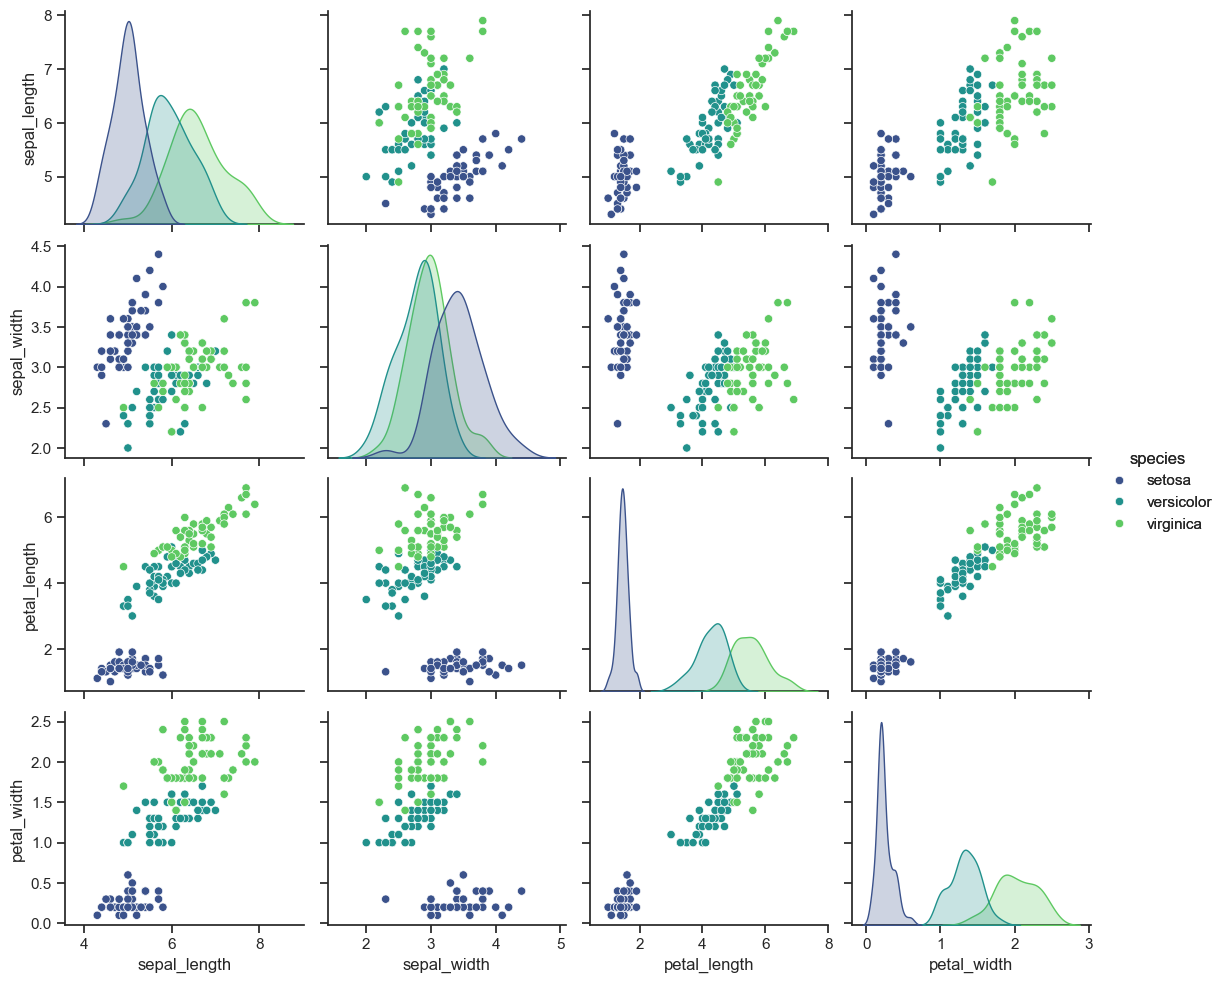

In [69]:
# Load the "iris" dataset
iris = sns.load_dataset("iris")

# Create a Facet Grid of pairwise scatterplots
g = sns.pairplot(iris, hue="species", palette="viridis")
g.add_legend()
plt.show()